<a href="https://colab.research.google.com/github/AUSTIN-OMONDI/Austoo/blob/main/car_price_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Data Exploration

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('car_price_dataset.csv')

In [3]:
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [4]:
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [5]:
df.isnull().sum()

,0
Brand,0
Model,0
Year,0
Engine_Size,0
Fuel_Type,0
Transmission,0
Mileage,0
Doors,0
Owner_Count,0
Price,0


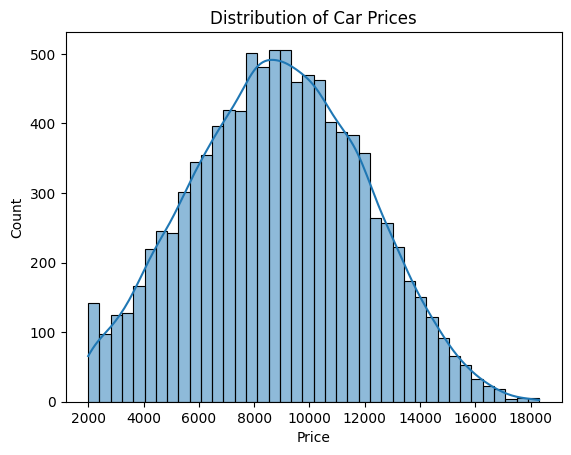

In [6]:
# Visualize the distribution of the target variable (Price)
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Car Prices')
plt.show()

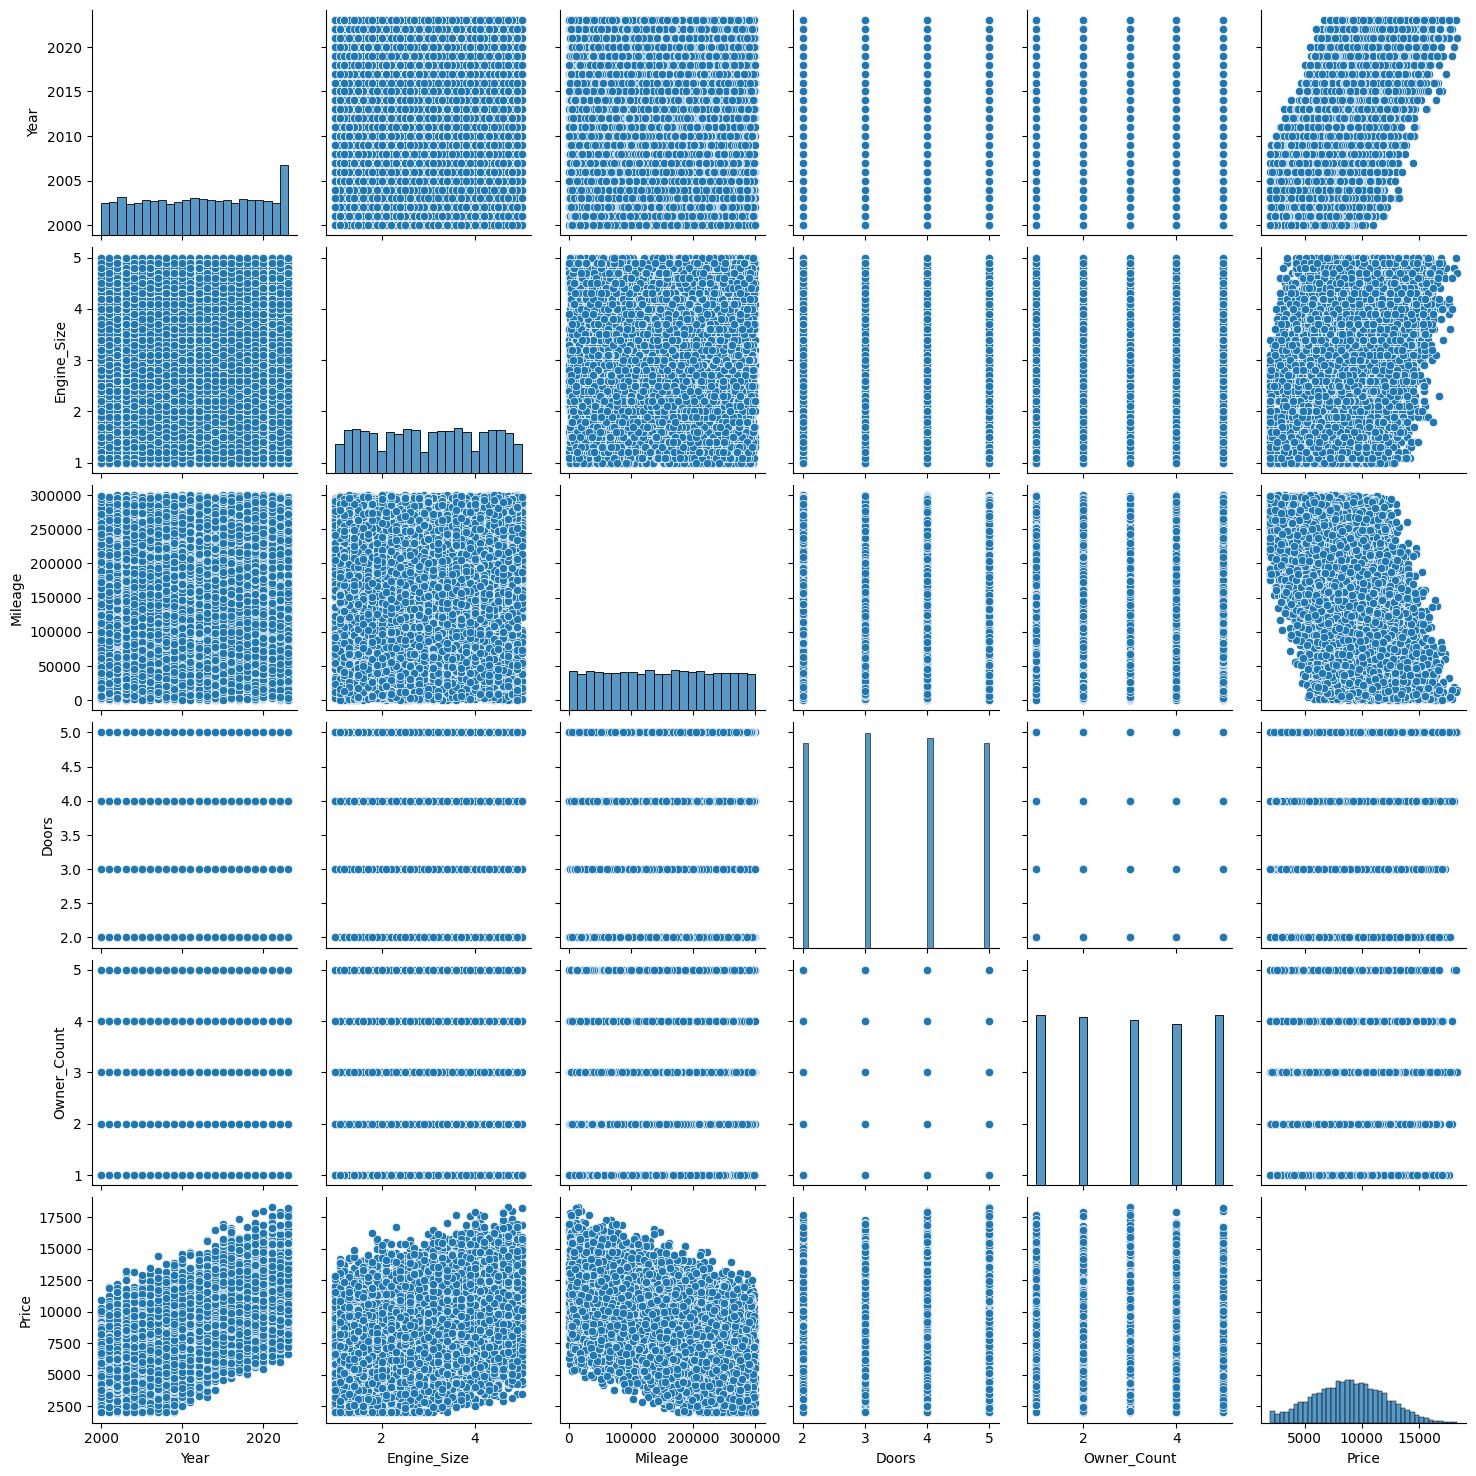

In [7]:
# Pairplot to visualize relationships between numerical variables
sns.pairplot(df)
plt.show()

##2. Data Cleaning

In [8]:
# Fill missing values in numeric columns with their mean
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [9]:
# For categorical columns, you can fill missing values with the mode (most frequent value)
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [10]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [11]:
# Correct data types (if necessary)
df['Year'] = df['Year'].astype(int)
df['Mileage'] = df['Mileage'].astype(int)

##3. Feature Engineering

In [12]:
# Create a new feature: Age of the car
df['Age'] = 2025 - df['Year']

In [13]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Brand', 'Model', 'Fuel_Type', 'Transmission'], drop_first=True)

In [14]:
# Normalize/Scale numerical features
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
df[['Engine_Size', 'Mileage', 'Age']] = scaler.fit_transform(df[['Engine_Size', 'Mileage', 'Age']])

##4. Model Selection

In [16]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a model (e.g., Random Forest)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)

##5. Model Training

In [17]:
# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

##6. Model Evaluation

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

In [19]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R-squared: {r2}')

MAE: 437.64779500000003
MSE: 294115.30494625005
R-squared: 0.9679885363578428


##7. Model Tuning

In [20]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best parameters
print(grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


##Model Deployment

In [21]:
import joblib

# Save the model
joblib.dump(best_model, 'car_price_model.pkl')

# Load the model (for deployment)
# loaded_model = joblib.load('car_price_model.pkl')

['car_price_model.pkl']